A simple Pandas exploration from the scrapped data (forbes/wikipedia/google finance)

In [1]:
#importing the required libraries and setting up the scene
import pandas as pd
import numpy as np
%matplotlib inline
import re

In [2]:
# load the companies data scrapped into a pandas dataframe
file = "companies_data.csv"
df = pd.read_csv(file, encoding='latin-1')

In [3]:
df.head(n=3)

,Name,Type,Industry,MarketCap,Sales,Founded,ISIN,Employees,Country,WebSite
0,mitsubishi-ufj-financial,Public KK,Major Banks,$83.9,$49.17,2001,00000000,"110,936",Japan,http://www.mufg.jp/english/index.html
1,sberbank,Public (PAO),Regional Banks,$63.9,$43.04,1841,00000000,"325,075",Russia,http://www.sberbank.com
2,state-bank-of-india,Public,Regional Banks,$36.5,$43.7,1806,00000000,"207,739",India,https://bank.sbi/


In [4]:
#converiting the Sales and Markeycap figures to Numeric and removing the "$"sign, also the Employee count
pattern = re.compile('\W+')
df['Employees'] = df.Employees.apply(lambda x: ''.join(re.split(pattern,x)))
df.Sales = df.Sales.apply(lambda x: float(x[1:]))
df.MarketCap = df.MarketCap.apply(lambda x: float(x[1:]))

In [5]:
df.head(n=3)

,Name,Type,Industry,MarketCap,Sales,Founded,ISIN,Employees,Country,WebSite
0,mitsubishi-ufj-financial,Public KK,Major Banks,83.9,49.17,2001,00000000,110936,Japan,http://www.mufg.jp/english/index.html
1,sberbank,Public (PAO),Regional Banks,63.9,43.04,1841,00000000,325075,Russia,http://www.sberbank.com
2,state-bank-of-india,Public,Regional Banks,36.5,43.70,1806,00000000,207739,India,https://bank.sbi/


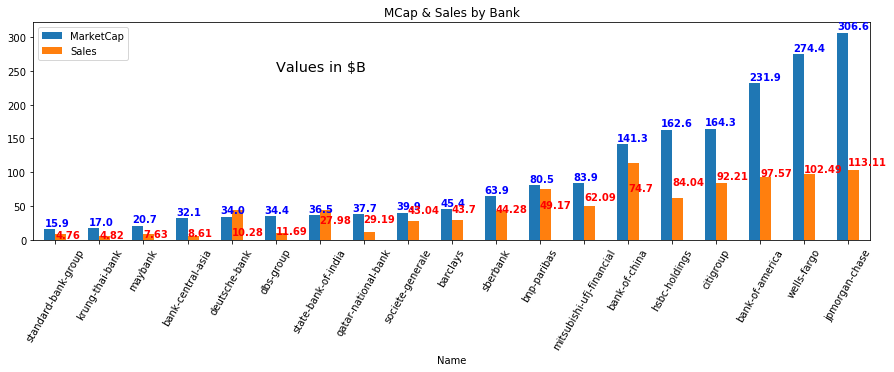

In [6]:
ax = df.drop('Founded',axis=1).sort_values(by='MarketCap').plot(x='Name', kind="bar", width=0.50,rot=60,figsize=(15,4),title="MCap & Sales by Bank")
for i, v in enumerate(df.MarketCap.sort_values()):
    ax.text(i-0.25, v+5, str(v), color='blue', fontweight='bold')
for i, v in enumerate(df.Sales.sort_values()):
    ax.text(i, v+-3, str(v), color='red', fontweight='bold')
ax.text(5,250,"Values in $B", color="black",size='x-large')

In [7]:
#Loading different Banks data into dataframes and concatenating them into single Frame
files = {
'f1' : "DBS_Bank.csv",
'f2' : "Citigroup.csv",
'f3' : "BNP_Paribas.csv",
'f4' : "Deutsche_Bank.csv",
'f5' : "JPMorgan_Chase.csv"
}
df1 = pd.read_csv(files['f1'], encoding='latin-1')
df2 = pd.read_csv(files['f2'], encoding='latin-1')
df3 = pd.read_csv(files['f3'], encoding='latin-1')
df4 = pd.read_csv(files['f4'], encoding='latin-1')
df1['Date'] = pd.to_datetime(df1.Date)
df2['Date'] = pd.to_datetime(df2.Date)
df3['Date'] = pd.to_datetime(df3.Date)
df4['Date'] = pd.to_datetime(df4.Date)
df1['bank'] = 'DbsB'
df2['bank'] = 'CitiB'
df3['bank'] = 'BNPP'
df4['bank'] = 'DeutB'
df = pd.concat([df1,df2,df3,df4])

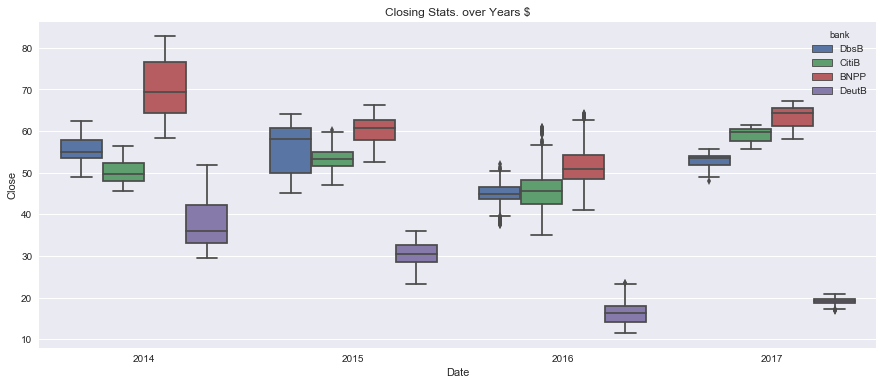

In [8]:
#Boxplot to showing the statistical variance of the stock close prices over the years for different banks
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15,6)
sns.boxplot(data = df, x=df.Date.dt.year,y=df.Close,hue=df.bank).set_title("Closing Stats. over Years $")

The Box plot above shows that the DBS bank has reduced its performance since 2014 and CitiBank actually outperformed it in comming years.

The change isn't abrupt either - The lower 25th percentile of the Data has slowly increased from 2014-2015 and many outliers (in this case very less than the actual 25% data is present for DBS Bank - Not necessarily outliers)

In [9]:
df.groupby([df.Date.dt.year,'bank']).mean()

Open       High        Low      Close  Adj Close  \
Date bank                                                           
2014 BNPP   70.004524  70.119524  69.892857  70.011111  61.552466   
     CitiB  50.195198  50.594127  49.813611  50.194008  49.070968   
     DbsB   55.597619  55.833849  55.430159  55.675516  55.675516   
     DeutB  37.881816  38.112334  37.595271  37.851506  36.072207   
2015 BNPP   60.148175  60.263770  60.054564  60.164603  54.450412   
     CitiB  53.301984  53.745198  52.800992  53.276865  52.173853   
     DbsB   55.863135  56.107222  55.581230  55.868135  55.868135   
     DeutB  30.345794  30.561191  30.106706  30.342421  29.690911   
2016 BNPP   51.737143  51.798254  51.654802  51.726944  48.692183   
     CitiB  46.337857  46.861270  45.852936  46.386111  45.691265   
     DbsB   44.658809  45.026468  44.393810  44.740000  44.740000   
     DeutB  16.248214  16.434167  16.037698  16.242936  16.059464   
2017 BNPP   63.664838  63.708871  63.548387  63.602096  61.025527   
     CitiB  59.168387  59.676129  58.629032  59.144839  58.659535   
     DbsB   52.725806  53.232419  52.534194  53.027581  53.027581   
     DeutB  19.089032  19.270484  18.907097  19.093871  18.878196   

                  Volume  
Date bank                 
2014 BNPP   2.441667e+03  
     CitiB  2.050971e+07  
     DbsB   4.032659e+04  
     DeutB  1.726411e+06  
2015 BNPP   3.555159e+03  
     CitiB  1.842832e+07  
     DbsB   3.744841e+04  
     DeutB  2.021478e+06  
2016 BNPP   1.559127e+03  
     CitiB  2.210681e+07  
     DbsB   7.116270e+04  
     DeutB  6.155133e+06  
2017 BNPP   1.525806e+03  
     CitiB  1.910891e+07  
     DbsB   9.074355e+04  
     DeutB  7.431527e+06

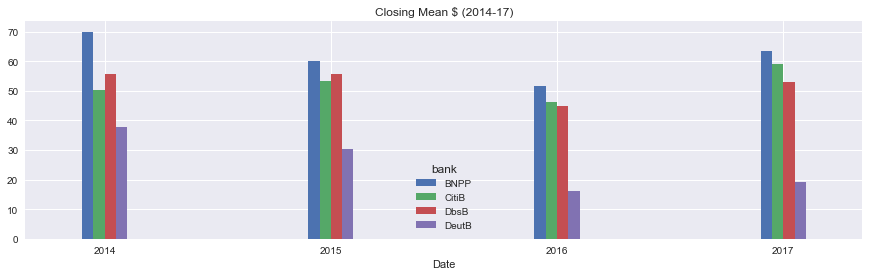

In [10]:
#unstacking the dataframe to groupped columns for a better representation.
d = df.groupby([df.Date.dt.year,'bank']).mean().Close.sort_values(ascending=False).unstack()
d.plot(kind='bar',width=0.20,rot=0,figsize=(15,4),title="Closing Mean $ (2014-17)")